## Study Case

Pactube merupakan platform streaming video. Pactube ingin menguji algoritma rekomendasi baru yaitu, personalize-recommendation. Apakah algoritma baru ini lebih unggul dibanding algoritma lama yaitu, rank-recommendation? 

Hypotesis Testing: Two Sample Test
Apakah rata-rata waktu streaming user dengan algoritma baru lebih tinggi dibanding yang lama (alpha 5%)

## Praprocessing Data

In [1]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv('streaming_pactube.csv')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                3148 non-null   int64  
 1   user_id           3148 non-null   int64  
 2   register_time     3148 non-null   object 
 3   register_country  3148 non-null   object 
 4   group             3148 non-null   object 
 5   type_algorithm    3148 non-null   object 
 6   time_stream       3142 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 172.3+ KB


In [2]:
# Checking duplicate data
data.duplicated(['user_id']).sum()

#menampilkan data yang duplikat
ids = data['user_id']
data_dup=data[ids.isin(ids[ids.duplicated()])].sort_values("user_id")
data_dup

,no,user_id,register_time,register_country,group,type_algorithm,time_stream
72,73,109386525,2020-03-30 23:17:47 UTC,United States,control,rank-recommendation,58.484050
60,61,109386525,2020-03-30 23:17:47 UTC,United States,control,rank-recommendation,72.331870
56,57,109387140,2020-03-04 03:08:17 UTC,United States,control,rank-recommendation,50.330427
55,56,109387140,2020-03-04 03:08:17 UTC,United States,control,rank-recommendation,63.167783
119,120,109388034,2020-04-29 01:55:28 UTC,United States,control,rank-recommendation,75.703852
142,143,109388034,2020-04-29 01:55:28 UTC,United States,control,rank-recommendation,91.413945
386,387,109392413,2020-05-19 19:12:08 UTC,United States,control,rank-recommendation,77.207875
393,394,109392413,2020-05-19 19:12:08 UTC,United States,control,rank-recommendation,78.769247


In [3]:
# Dropping duplicates data
data.drop_duplicates(subset='user_id',inplace=True)
data.shape

(3144, 7)

In [4]:
# Checking missing value
data.isna().sum()

#drop missing value
data = data.dropna()

In [5]:
# Cek group & landing page yang tidak sesuai
group_name = "treatment"
type_algorithm_name = "rank-recommendation"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_algorithm = data["type_algorithm"] == type_algorithm_name

# Seleksi data dengan kondisi di atas
data_salah_1 = data[condition_group & condition_algorithm]

In [6]:
# tampilkan data salah
data_salah_1.head()

,no,user_id,register_time,register_country,group,type_algorithm,time_stream


In [7]:
# Cek group & landing page yang tidak sesuai
group_name = "control"
type_algorithm_name = "personalize-recommendation"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_algorithm = data["type_algorithm"] == type_algorithm_name

# Seleksi data dengan kondisi di atas
data_salah_2 = data[condition_group & condition_algorithm]

In [8]:
# tampilkan data salah
data_salah_2.head()

,no,user_id,register_time,register_country,group,type_algorithm,time_stream


## Data Exploration

In [9]:
## Groupping Control and Treatment User

# Buat data control
data_control = data[data["group"] == "control"]
data_control.head()

# Buat data treatment
data_treatment = data[data["group"] == "treatment"]
data_treatment.head()

# Banyak user di group control
n_control = data_control.shape[0]
n_control

# Banyak user di group treatment
n_treatment = data_treatment.shape[0]
n_treatment

#rata-rata time stream tiap grup
data.groupby('group')['time_stream'].mean()

group
control      69.763342
treatment    80.006694
Name: time_stream, dtype: float64

<Axes: xlabel='group', ylabel='time_stream'>

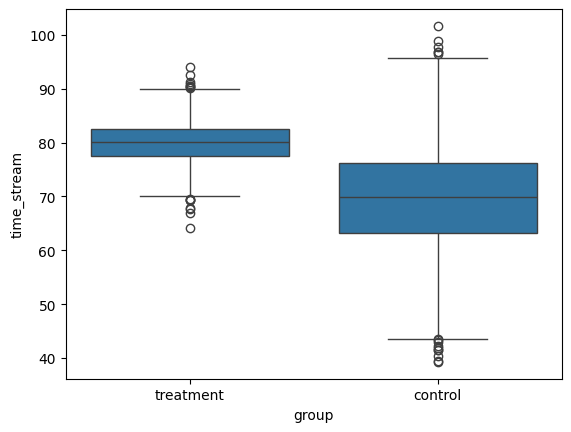

In [10]:
## Box Plot Time Stream by Group
import seaborn as sns

sns.boxplot(x='group', y='time_stream', data=data)  

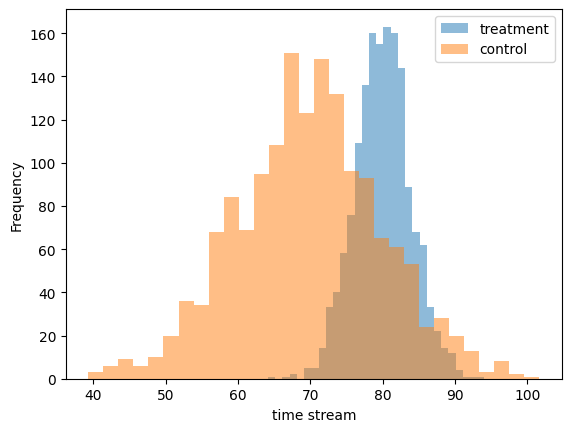

In [11]:
#visualisasi histogram

import matplotlib.pyplot as plt

#define time_stream values by group
treat = data.loc[data['group'] == 'treatment', 'time_stream']
con = data.loc[data['group'] == 'control', 'time_stream']

#add three histograms to one plot
plt.hist(treat, alpha=0.5, label='treatment', bins=30)
plt.hist(con, alpha=0.5, label='control', bins=30)

#add plot title and axis labels
plt.xlabel('time stream')
plt.ylabel('Frequency')

#add legend
plt.legend()

#display plot
plt.show()

## Hypotesis Testing

- Kita ingin membuktikan: **rata-rata time stream** algoritma recsys **baru (treatment)** **lebih besar** dari algoritma recysis **lama (control)**
- Misal,
  - $\mu_1$ adalah rata-rata time stream **treatment**
  - $\mu_2$ adalah rata-rata time stream **control** 

- Maka kita bisa mendefinisikan Null hypothesis ($H_0$) dan Alternative hypothesis ($H_1$)

    $$H_0 : \mu_1 = \mu_2$$
    $$H_1 : \mu_1 > \mu_2$$

- Set siginificance level (alpha)
 - Significance level = 0.05

In [17]:
from scipy import stats
result = stats.ttest_ind(a = data_treatment['time_stream'],
                         b = data_control['time_stream'],
                         equal_var=False,
                         alternative = "greater")

#menampilkan pvalue
p_value = result.pvalue
print(f"p_value : {p_value:.3f}")

p_value : 0.000


In [18]:
#menampilkan t-statistics
t_stats=result.statistic
print(f"t-stats : {t_stats:.3f}")

t-stats : 37.829


In [19]:
# Perbandingan t-statistics dengan critical value
# Kita harus menghitung t-critical terlebih dahulu

# t critical adalah z-value saat alpha
alpha = 0.05           # alpha yang kita set
df = len(data_treatment['time_stream'])+len(data_control['time_stream'])-2  #df=n1+n2-2

t_critical = stats.t.ppf(1 - alpha, df)
print(f"t-Critical : {t_critical:.3f}")

t-Critical : 1.645


In [20]:
#Melakukan pengambilan keputusan dari t-stats dan t-crit
if t_stats > t_critical:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [21]:
# Perbandingan P-Value dengan alpha.
if(p_value <  alpha):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


## Kesimpulan

Dengan CL sebesar 95%, didapatkan hasil keputusan uji hipotesis baik menggunakan p-value maupun t-statistics memberikan hasil yang sama, yaitu tolak 
. Jadi, kita dapat menyimpulkan bahwa dengan tingkat keyakinan 95%, terdapat cukup bukti bahwa rata-rata time stream user yang mendapat algoritma recommendation system baru lebih tinggi dibandingkan yang lama.

## Confidence Interval

In [23]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_treatment['time_stream']),
                  d2 = DescrStatsW(data=data_control['time_stream']))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 9.712313315114612 10.774390841341729 ]


Berdasarkan hasil tersebut, kita yakin 95% bahwa selisih rata-rata time stream pada grup treatment dan kontrol terletak antara 9.712 dan 10.774 menit.

Atau dapat dikatakan bahwa peningkatan time stream jika menggunakan recsys baru sebesar 9.712 hingga 10.774 menit.